In [83]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

In [84]:
x_src_path = '../Dataset/MixedDataSet.json'
y_src_path = '../DataBook/Mixed_Data_Analyst.xlsx'

In [85]:
data = pd.read_json(x_src_path)

In [86]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [87]:
X = np.nan_to_num(data.values, nan=0, copy=True).astype(int)
y = plagiarised_array
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
#seed 32 results 100% on test score 24

In [89]:
count_0 = 0
count_1 = 0

for element in y_test:
    if element == 0:
        count_0 += 1
    elif element == 1:
        count_1 += 1

print("Number of 0s:", count_0)
print("Number of 1s:", count_1)

Number of 0s: 34
Number of 1s: 6


In [90]:
# for i in range(50):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
#     print("this stage is " + str(i))
#     count_y_train_1 = np.sum(y_train == 1)
#     count_y_test_1 = np.sum(y_test == 1)
#     print(count_y_train_1)
#     print(count_y_test_1)
#     print("")

In [91]:
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 1.0
Test data score: 0.7


In [92]:
# predictions = p.predict(X_test)
# for i in range(len(X_test)):
#     print("Predicted:", predictions[i], "Actual:", y_test[i])
y_pred = p.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.12      0.17      0.14         6

    accuracy                           0.70        40
   macro avg       0.48      0.48      0.48        40
weighted avg       0.74      0.70      0.72        40



In [93]:
predictions = p.predict(X_test)
for i in range(len(X_test)):
    print("Predicted:", predictions[i], "Actual:", y_test[i])
# y_pred = p.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# print(classification_report(y_test, y_pred))

Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 1 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0


In [94]:
modelNames = [
    '1d',
    '2d',
    '3d',
    '4d',
    '5d',
    '6d',
    '7d'
]

NODES_PER_HIDDEN_LAYER = 128

models = [ 

    keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(2, activation='softmax')
]),

    keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

]

In [95]:
LOSS_FN = keras.losses.sparse_categorical_crossentropy

for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

In [96]:
TRAINING_EPOCHS = 20

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(X_train, y_train, epochs=TRAINING_EPOCHS)


training model 1d
Epoch 1/20
3/3 [==============================] - 0s 5ms/step - loss: 9332.2256 - accuracy: 0.6022
Epoch 2/20
3/3 [==============================] - 0s 6ms/step - loss: 17867.7227 - accuracy: 0.8495
Epoch 3/20
3/3 [==============================] - 0s 5ms/step - loss: 14732.8525 - accuracy: 0.8710
Epoch 4/20
3/3 [==============================] - 0s 5ms/step - loss: 7638.6655 - accuracy: 0.9140
Epoch 5/20
3/3 [==============================] - 0s 5ms/step - loss: 9294.0205 - accuracy: 0.7957
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 5155.2988 - accuracy: 0.7849
Epoch 7/20
3/3 [==============================] - 0s 5ms/step - loss: 4537.1069 - accuracy: 0.7849
Epoch 8/20
3/3 [==============================] - 0s 6ms/step - loss: 749.6462 - accuracy: 0.8710
Epoch 9/20
3/3 [==============================] - 0s 6ms/step - loss: 1778.6053 - accuracy: 0.8602
Epoch 10/20
3/3 [==============================] - 0s 5ms/step - loss: 899.0941 - accuracy

In [97]:
# get all model accuracy scores on test data
scores = [model.evaluate(X_test,y_test)[1] for model in models]

2/2 [==============================] - 0s 6ms/step - loss: 94.3863 - accuracy: 0.9000


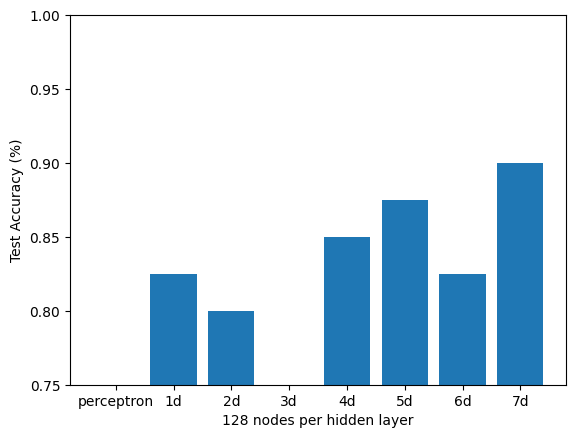

In [98]:
modelNames.insert(0, 'perceptron')
scores.insert(0, p.score(X_test, y_test) )

plt.bar(modelNames,scores)
plt.ylim(0.75, 1.0)
plt.ylabel('Test Accuracy (%)') 
plt.xlabel(str(NODES_PER_HIDDEN_LAYER) + " nodes per hidden layer")
plt.show()

In [100]:
probabilities = [model.predict(X_test) for model in models]

# Convert probabilities to class labels
predicted_labels = [np.argmax(prob, axis=1) for prob in probabilities]

# Assuming y_test is your actual labels
# Convert y_test to class labels if it's not already in that format
# This step depends on how y_test is structured. If it's one-hot encoded, you might need to use np.argmax(y_test, axis=1)

# Print predicted and actual labels for each model
for i, labels in enumerate(predicted_labels):
    print(f"Model {i+1} Predicted Labels: {labels}")
    print(f"Actual Labels: {y_test}")

2/2 [==============================] - 0s 6ms/step
Model 1 Predicted Labels: [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 2 Predicted Labels: [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 3 Predicted Labels: [0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0
 1 1 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 4 Predicted Labels: [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 5 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Actual Label